# Deep Learning to detect numbers

## Libraries

In [24]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from nn import transform
import os

In [25]:
batch_size = 16
n_epochs = 10
lr = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
device

device(type='cuda')

## Dataset

In [42]:
dataset_path = 'dataset/'
classes = range(len(os.listdir(dataset_path)))

In [53]:
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
n_classes = len(dataset.classes)

torch.Size([1, 96, 96]) 2


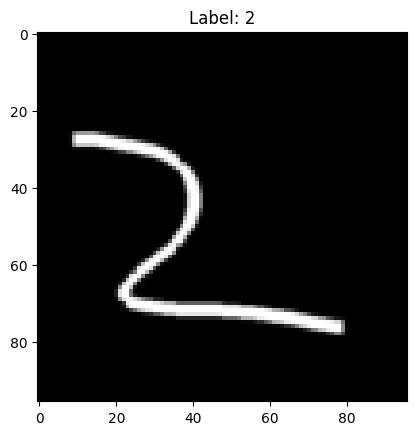

torch.Size([1, 96, 96]) 6


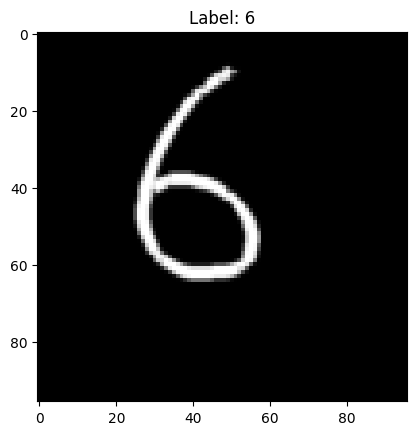

torch.Size([1, 96, 96]) 1


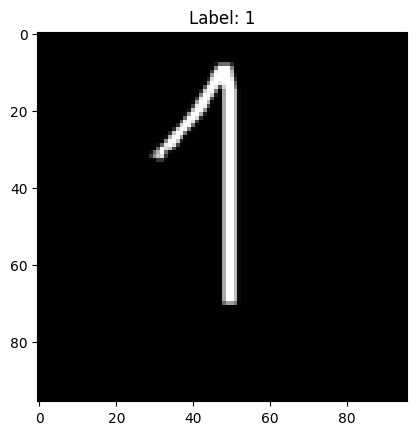

torch.Size([1, 96, 96]) 3


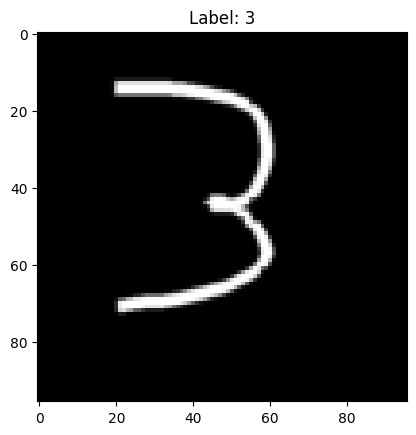

torch.Size([1, 96, 96]) 6


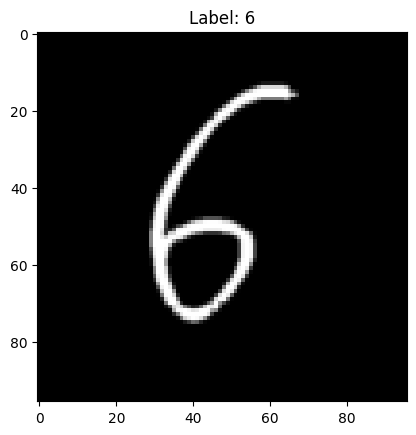

torch.Size([1, 96, 96]) 4


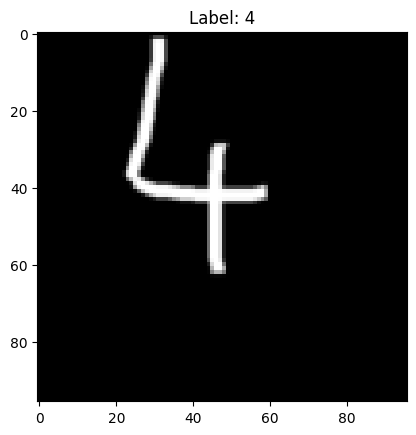

torch.Size([1, 96, 96]) 5


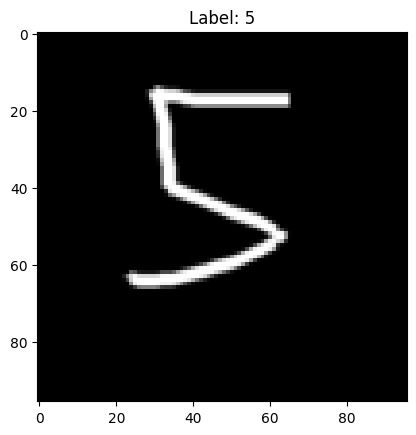

torch.Size([1, 96, 96]) 1


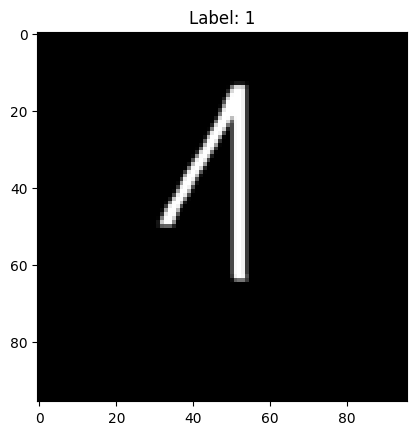

torch.Size([1, 96, 96]) 7


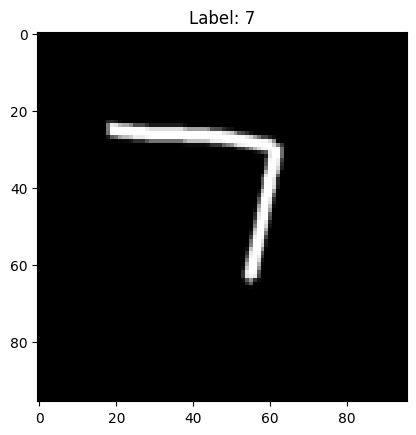

torch.Size([1, 96, 96]) 2


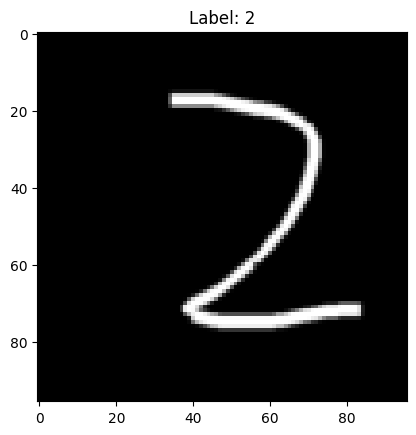

torch.Size([1, 96, 96]) 2


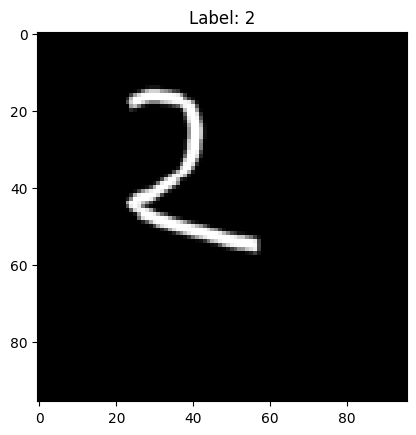

torch.Size([1, 96, 96]) 0


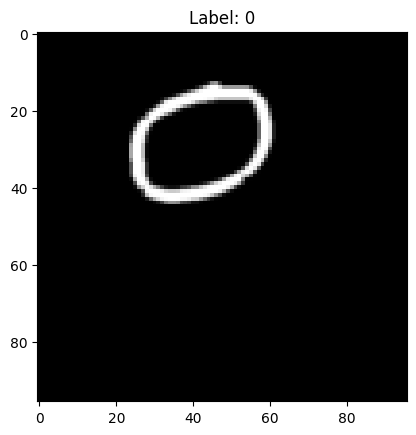

torch.Size([1, 96, 96]) 0


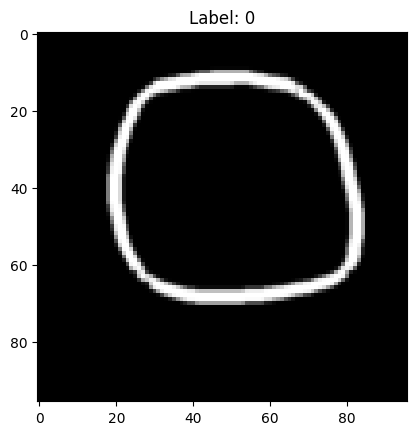

torch.Size([1, 96, 96]) 7


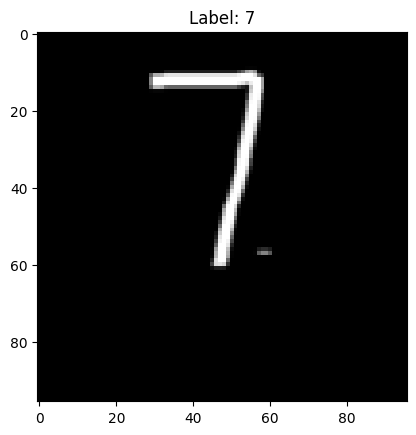

torch.Size([1, 96, 96]) 3


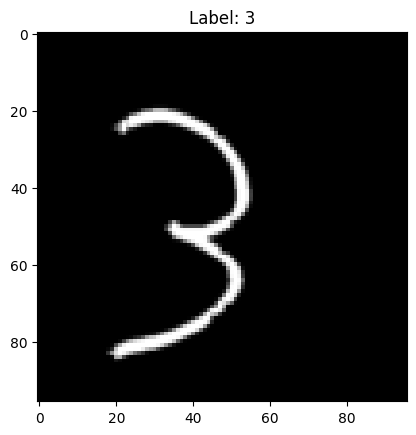

torch.Size([1, 96, 96]) 4


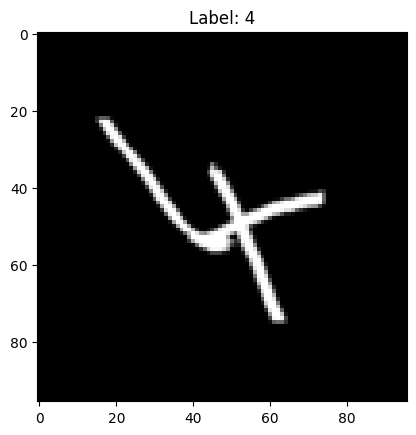

In [54]:
# Function to show an image
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title(title)
    plt.show()

# Get some random training images
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Show images with labels
for i in range(len(images)):
    print(images[i].shape, labels[i].item())
    imshow(images[i], title=f'Label: {labels[i].item()}')

In [55]:
# total number of images
print(len(dataset))

2273


In [56]:
n_classes

8

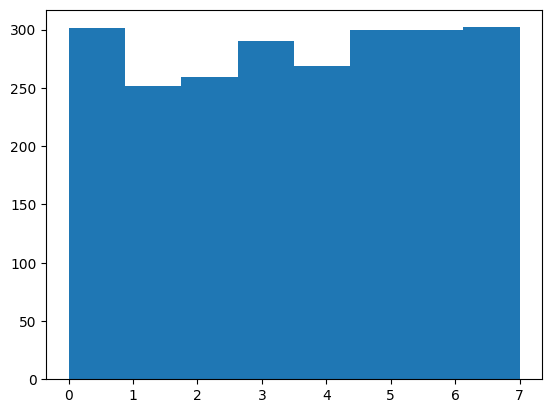

In [57]:
# plot histogram of the number of images per class
plt.hist(dataset.targets, bins=n_classes)
plt.show()

## Neural Network

In [58]:
from nn import Net
net = Net(n_classes=n_classes).to(device)

In [59]:
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7056, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=8, bias=True)
)

In [60]:
# number of parameters
sum(p.numel() for p in net.parameters())

860256

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Train the network

for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()


        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
    # print loss 
    print(f'Epoch {epoch + 1}, loss: {running_loss / len(dataloader)}')

print('Finished Training')

Epoch 1, loss: 2.069110990404249
Epoch 2, loss: 1.9840207258304516
Epoch 3, loss: 1.3610313730640011
Epoch 4, loss: 0.792702114613323
Epoch 5, loss: 0.5164497974035623
Epoch 6, loss: 0.3352076570027983
Epoch 7, loss: 0.22752268656671465
Epoch 8, loss: 0.15859077225432738
Epoch 9, loss: 0.17444180721951114
Epoch 10, loss: 0.06654374975909746
Finished Training


In [62]:
# Save the model
torch.save(net.state_dict(), 'mnist_netV11.pth')